# Assignment 1

In [2]:
import pylab as pl
import pandas as pd
import numpy as np
%pylab inline

import os

import json
s = json.load( open("/Users/xiaogewu/PUI2015_fbianco/fbb_matplotlibrc.json") )
pl.rcParams.update(s)

Populating the interactive namespace from numpy and matplotlib


//anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:855: UserWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
#Load citibike data of June 2015
df=pd.read_csv('/Users/xiaogewu/documents/NYU/Informatics/201506-citibike-tripdata.csv')
print df.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender'],
      dtype='object')


# By Gender

In [4]:
df['ageM'] = 2015-df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 1)]
df['ageF'] = 2015-df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 2)]

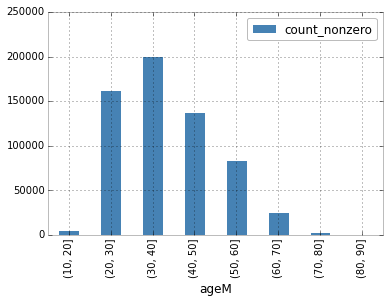

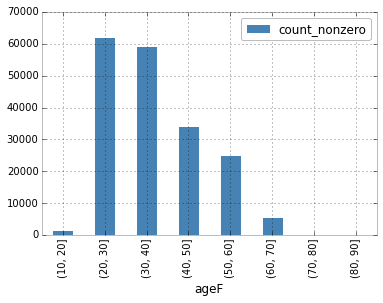

In [5]:
bins = np.arange(10, 99, 10)
df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero]).plot(kind='bar')
df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero]).plot(kind='bar')

          count_nonzero
ageM                   
(10, 20]       0.000033
(20, 30]       0.067160
(30, 40]       0.058401
(40, 50]       0.018044
(50, 60]       0.015117
(60, 70]       0.002513
(70, 80]       0.000238
(80, 90]       0.000000


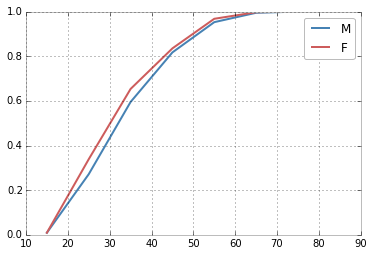

In [6]:
#print df.ageS, df.ageS.cumsum()

csM=df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero]).cumsum()

csF=df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero]).cumsum()

print np.abs(csM / csM.max()-csF / csF.max())

pl.plot(bins[:-1] + 5, csM / csM.max(), label = "M")
pl.plot(bins[:-1] + 5, csF / csF.max(), label = "F")
pl.legend()

# K-S Test

In [7]:
import scipy.stats

In [8]:
df.ageF1=df.ageF[~np.isnan(df.ageF)] 
df.ageM1=df.ageM[~np.isnan(df.ageM)] 

In [9]:
ks=scipy.stats.ks_2samp(df.ageM1, df.ageF1)

In [10]:
scipy.stats.ks_2samp(df.ageM1, df.ageF1)

Ks_2sampResult(statistic=0.076862276800960139, pvalue=0.0)

# Pearson's Test

In [11]:
len(df.ageM1),len(df.ageF1)

(621580, 188655)

In [12]:
df.ageM2= np.random.choice(df.ageM1,len(df.ageF1),replace=False)

In [13]:
df.ageM2

array([ 37.,  36.,  35., ...,  48.,  28.,  28.])

In [14]:
df.ageF2= list(df.ageF1)

In [15]:
len(df.ageM2),len(df.ageF2)

(188655, 188655)

In [16]:
scipy.stats.pearsonr(df.ageM2, df.ageF2)

(0.0012689310798947434, 0.58153113047738825)

# Spearman's Test

In [17]:
scipy.stats.spearmanr(df.ageM2, df.ageF2)

SpearmanrResult(correlation=0.00098366783388793844, pvalue=0.66919883282679549)

# By Time (Day/Night)

In [20]:
df['hour'] = pd.to_datetime(df['starttime']).dt.hour

ageD = 2015-df['birth year'][(df['usertype'] == 'Subscriber')&((df['hour'] >= 6) & (df['hour']<=18))]
ageN = 2015-df['birth year'][(df['usertype'] == 'Subscriber')&((df['hour'] > 18) | (df['hour']<6))]

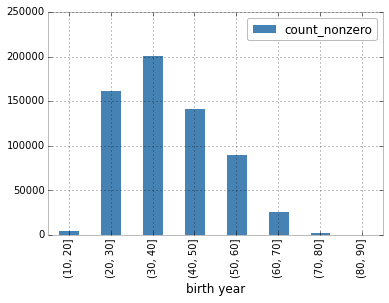

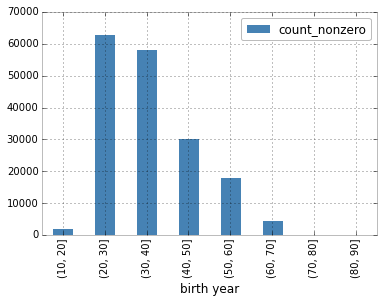

In [23]:
bins = np.arange(10, 99, 10)
ageD.groupby(pd.cut(ageD, bins)).agg([count_nonzero]).plot(kind='bar')
ageN.groupby(pd.cut(ageN, bins)).agg([count_nonzero]).plot(kind='bar')

          count_nonzero
ageM                   
(10, 20]       0.000033
(20, 30]       0.067160
(30, 40]       0.058401
(40, 50]       0.018044
(50, 60]       0.015117
(60, 70]       0.002513
(70, 80]       0.000238
(80, 90]       0.000000


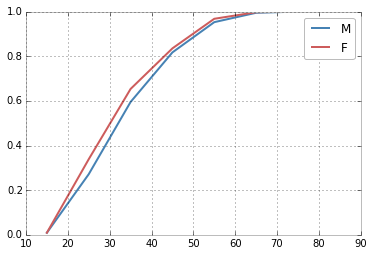

In [24]:
#print df.ageS, df.ageS.cumsum()

csD=ageD.groupby(pd.cut(ageD, bins)).agg([count_nonzero]).cumsum()

csN=ageN.groupby(pd.cut(ageN, bins)).agg([count_nonzero]).cumsum()

print np.abs(csM / csM.max()-csF / csF.max())

pl.plot(bins[:-1] + 5, csM / csM.max(), label = "M")
pl.plot(bins[:-1] + 5, csF / csF.max(), label = "F")
pl.legend()

# K-S Test

In [26]:
import scipy.stats
ageD1=ageD[~np.isnan(ageD)] 
ageN1=ageN[~np.isnan(ageN)] 
ks=scipy.stats.ks_2samp(ageD, ageN)
scipy.stats.ks_2samp(ageD1, ageN1)

Ks_2sampResult(statistic=0.12523165876571046, pvalue=0.0)

# Pearson's Test

In [27]:
len(ageD1),len(ageN1)

(633419, 177408)

In [28]:
ageN2= np.random.choice(ageD1,len(ageD1),replace=False)
ageD2= list(ageD1)
scipy.stats.pearsonr(ageD2, ageN2)

(-0.0005258688914331277, 0.67556275463875326)

# Spearman's Test

In [29]:
scipy.stats.spearmanr(ageD2, ageN2)

SpearmanrResult(correlation=-0.00055650177905749499, pvalue=0.65783393899495834)